Задача:

- Разработать модель, предсказывающую к какому из трех сегментов относится каждый клиент.

- Целевая переменная - TARGET. Каждому сегменту отвечает цифра 0, 1 или 2.

# Импорт данных/библиотек

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import f1_score, precision_score, recall_score, plot_confusion_matrix
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC

from catboost import CatBoostClassifier

import plotly.express as px 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
cf.go_offline()

from imblearn.over_sampling import SMOTE, RandomOverSampler

import shap

import warnings
warnings.filterwarnings("ignore")

# Фиксируем random-state
RAND=10

In [6]:
df_tn = pd.read_csv('contest_train.csv')

df_tt = pd.read_csv('contest_test.csv')

# Первый взгляд на данные

In [7]:
# отобразим все столбцы в таблице

pd.set_option('display.max_columns', None)

In [8]:
df_tn.head()

ID  FEATURE_0  FEATURE_1  FEATURE_2  FEATURE_3  FEATURE_4  \
0   737005990        2.0        2.0        0.0        0.0        0.0   
1   336625142        2.0        1.0        0.0        0.0        0.0   
2  1146317240       12.0        5.0        0.0        0.0        0.0   
3  1152334700       59.0        5.0        0.0        0.0        0.0   
4  1148871905        1.0        1.0        0.0        0.0        0.0   

   FEATURE_5  FEATURE_6  FEATURE_7  FEATURE_8  FEATURE_9  FEATURE_10  \
0        0.0        0.0 -13.093355  22.223191        0.0         0.0   
1        0.0        0.0   1.920928 -14.228085        0.0         0.0   
2        0.0        0.0 -62.402398 -18.135059        0.0         0.0   
3        0.0        0.0 -25.523791 -11.967182        0.0         0.0   
4        0.0        0.0 -14.628149 -23.565047        0.0         0.0   

   FEATURE_11   FEATURE_12  FEATURE_13  FEATURE_14  FEATURE_15  FEATURE_16  \
0         0.0   533.055545         3.0         3.0         0.0         0.0   
1         0.0    77.445949         4.0         1.0         0.0         0.0   
2         0.0  1281.588378        11.0         7.0         0.0         0.0   
3         0.0    56.682700         2.0         2.0         0.0         0.0   
4         0.0   -20.958395         1.0         1.0         1.0         0.0   

   FEATURE_17  FEATURE_18  FEATURE_19  FEATURE_20  FEATURE_21  FEATURE_22  \
0         0.0         0.0         0.0         0.0    3.540889         0.0   
1         0.0         0.0         0.0         0.0    0.851897         0.0   
2         0.0         0.0         0.0         0.0   -2.311606         0.0   
3         1.0         0.0         0.0         0.0    3.461721         0.0   
4         1.0         1.0         0.0         0.0   21.588033         0.0   

   FEATURE_23  FEATURE_24  FEATURE_25  FEATURE_26  FEATURE_27  FEATURE_28  \
0    6.010374   -1.345941         0.0   -2.317090         0.0         0.0   
1   -6.911539    4.005305         0.0   18.030389         0.0         0.0   
2   -4.745698   15.256723         0.0   -9.288372         0.0         0.0   
3  -14.979268    6.584476         0.0    2.083072         0.0         0.0   
4 -117.359680  -90.086607         0.0  -40.119378         0.0         0.0   

   FEATURE_29  FEATURE_30  FEATURE_31  FEATURE_32  FEATURE_33   FEATURE_34  \
0         0.0         0.0         0.0         0.0   45.595312    31.056361   
1         0.0         0.0         0.0         0.0  -44.228516     2.888951   
2         0.0         0.0         0.0         0.0   32.411244   -49.744630   
3         0.0         0.0         0.0         0.0  779.596729  1484.581743   
4         0.0         0.0         0.0         0.0  119.828164   582.644326   

   FEATURE_35   FEATURE_36   FEATURE_37   FEATURE_38  FEATURE_39  FEATURE_40  \
0   61.251668    27.044580   -30.549305    64.179404         0.0         0.0   
1  -29.363987   -28.446865     9.735043     5.279001         0.0         0.0   
2  -10.413498    12.433387     3.289848   -21.593674       599.0         0.0   
3  486.919976  2031.418602  1618.459961  1890.229870         0.0         0.0   
4  126.671766  1160.607919   154.848770   896.661311         0.0         0.0   

   FEATURE_41  FEATURE_42  FEATURE_43  FEATURE_44   FEATURE_45    FEATURE_46  \
0         0.0         0.0         0.0         0.0   -13.846640     -4.867411   
1         0.0         0.0         0.0         0.0   -26.179239     58.785172   
2        10.0         0.0         0.0         0.0    56.341593     97.744150   
3         0.0         0.0         0.0         0.0  1440.543630    116.851382   
4         0.0         0.0         0.0         0.0  3922.767431  20063.360092   

   FEATURE_47  FEATURE_48    FEATURE_49  FEATURE_50   FEATURE_51  \
0  138.356993   41.342282     26.000672    3.534147    16.113696   
1   13.311758  -11.533431    -17.220208  -18.644461     8.790456   
2    2.036722   -8.813739     -5.815092   23.376911    92.579331   
3  285.124007  628.737637    430.248129  462.43

In [9]:
df_tn.shape

(18390, 262)

In [10]:
df_tn.info(max_cols=300)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18390 entries, 0 to 18389
Data columns (total 262 columns):
 #    Column       Non-Null Count  Dtype  
---   ------       --------------  -----  
 0    ID           18390 non-null  int64  
 1    FEATURE_0    18390 non-null  float64
 2    FEATURE_1    18390 non-null  float64
 3    FEATURE_2    18390 non-null  float64
 4    FEATURE_3    18390 non-null  float64
 5    FEATURE_4    18390 non-null  float64
 6    FEATURE_5    18390 non-null  float64
 7    FEATURE_6    18390 non-null  float64
 8    FEATURE_7    18390 non-null  float64
 9    FEATURE_8    17497 non-null  float64
 10   FEATURE_9    18390 non-null  float64
 11   FEATURE_10   18390 non-null  float64
 12   FEATURE_11   18390 non-null  float64
 13   FEATURE_12   18375 non-null  float64
 14   FEATURE_13   18390 non-null  float64
 15   FEATURE_14   18390 non-null  float64
 16   FEATURE_15   18390 non-null  float64
 17   FEATURE_16   18390 non-null  float64
 18   FEATURE_17   18390 non-n

Довольно много пропусков

In [11]:
df_tn.describe().iloc[1:, 1:]

FEATURE_0  FEATURE_1  FEATURE_2  FEATURE_3  FEATURE_4  FEATURE_5  \
mean    5.486678   1.331811   0.057205        0.0   0.142904   0.000218   
std    14.997055   1.814098   0.232240        0.0   0.349984   0.014747   
min     0.000000   0.000000   0.000000        0.0   0.000000   0.000000   
25%     0.000000   0.000000   0.000000        0.0   0.000000   0.000000   
50%     1.000000   1.000000   0.000000        0.0   0.000000   0.000000   
75%     5.000000   2.000000   0.000000        0.0   0.000000   0.000000   
max   385.000000  31.000000   1.000000        0.0   1.000000   1.000000   

      FEATURE_6    FEATURE_7    FEATURE_8  FEATURE_9  FEATURE_10  FEATURE_11  \
mean   0.011854    81.678910   280.978012   0.391028     0.24720    0.206036   
std    0.108233   255.963629  1216.091350   0.875560     0.54191    0.404468   
min    0.000000  -171.709797  -297.065679   0.000000     0.00000    0.000000   
25%    0.000000    -9.696251   -20.896074   0.000000     0.00000    0.000000   
50%    0.000000     3.785448     4.072580   0.000000     0.00000    0.000000   
75%    0.000000    27.932972    37.599829   0.000000     0.00000    0.000000   
max    1.000000  3147.341440  9963.242114  11.000000     5.00000    1.000000   

       FEATURE_12  FEATURE_13  FEATURE_14  FEATURE_15  FEATURE_16  FEATURE_17  \
mean   261.475960    5.308374    2.204350    0.126917    0.123709    0.130179   
std    489.299302   17.446309    2.304845    0.332889    0.329258    0.336510   
min   -307.805507    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.733362    1.000000    1.000000    0.000000    0.000000    0.000000   
50%     49.824563    2.000000    2.000000    0.000000    0.000000    0.000000   
75%    284.240502    4.000000    3.000000    0.000000    0.000000    0.000000   
max   6141.670997  662.000000   24.000000    1.000000    1.000000    1.000000   

      FEATURE_18  FEATURE_19  FEATURE_20  FEATURE_21  FEATURE_22  FEATURE_23  \
mean    0.116966    0.123437   -0.049761    5.855146   -0.368467    2.402736   
std     0.321388    0.328947    6.159022   42.608232   29.728673   50.708362   
min     0.000000    0.000000 -100.000000 -117.669869 -100.000000 -123.305025   
25%     0.000000    0.000000    0.000000   -2.895435    0.000000   -9.635232   
50%     0.000000    0.000000    0.000000    0.119715    0.000000   -0.117791   
75%     0.000000    0.000000    0.000000    3.662084    0.000000    8.150076   
max     1.000000    1.000000  225.000000  308.548398  300.000000  324.177493   

      FEATURE_24   FEATURE_25  FEATURE_26   FEATURE_27   FEATURE_28  \
mean    4.976385     1.879837    3.356816     0.416911     0.792333   
std    48.052318    35.362874   30.544469    17.566010    41.326592   
min  -122.617340     0.000000 -111.802447     0.000000     0.000000   
25%    -6.695635     0.000000  -13.258713     0.000000     0.000000   
50%     0.280963     0.000000    2.192581     0.000000     0.000000   
75%     9.659810     0.000000   18.444310     0.000000     0.000000   
max   302.869382  2284.200000  204.113181  1360.000000  3549.000000   

      FEATURE_29  FEATURE_30  FEATURE_31   FEATURE_32    FEATURE_33  \
mean    0.358021    0.309190    0.098151     0.181185    556.880915   
std    13.688606   12.690255    5.654738    16.435754   2693.960887   
min     0.000000    0.000000    0.000000     0.000000   -373.307474   
25%     0.000000    0.000000    0.000000     0.000000    -18.480949   
50%     0.000000    0.000000    0.000000     0.000000      7.414488   
75%     0.000000    0.000000    0.000000     0.000000     52.275825   
max   782.000000  882.000000  496.000000  2124.000000  51330.792972   

        FEATURE_34    FEATURE_35    FEATURE_36    FEATURE_37    FEATURE_38  \
mean    668.962191    731.059826    885.736540    982.615467   1121.815180   
std    3155.727871   3192.724341   3833.817008   3988.983292   4481.121458   
min    -319.650659   -310.390755   -411.320897   -363.086985   -313.106083   
25%     -17.755260    -17

# EDA

In [12]:
target = df_tn['TARGET'].value_counts()
df = pd.DataFrame({'labels': target.index,
                   'values': target.values
                   })

df.iplot(kind='pie', labels='labels', values='values',
         title='Распределение таргета')

Видим довольно сильный дисбаланс классов -> надо использовать модели с class_balance или применять метод oversampling

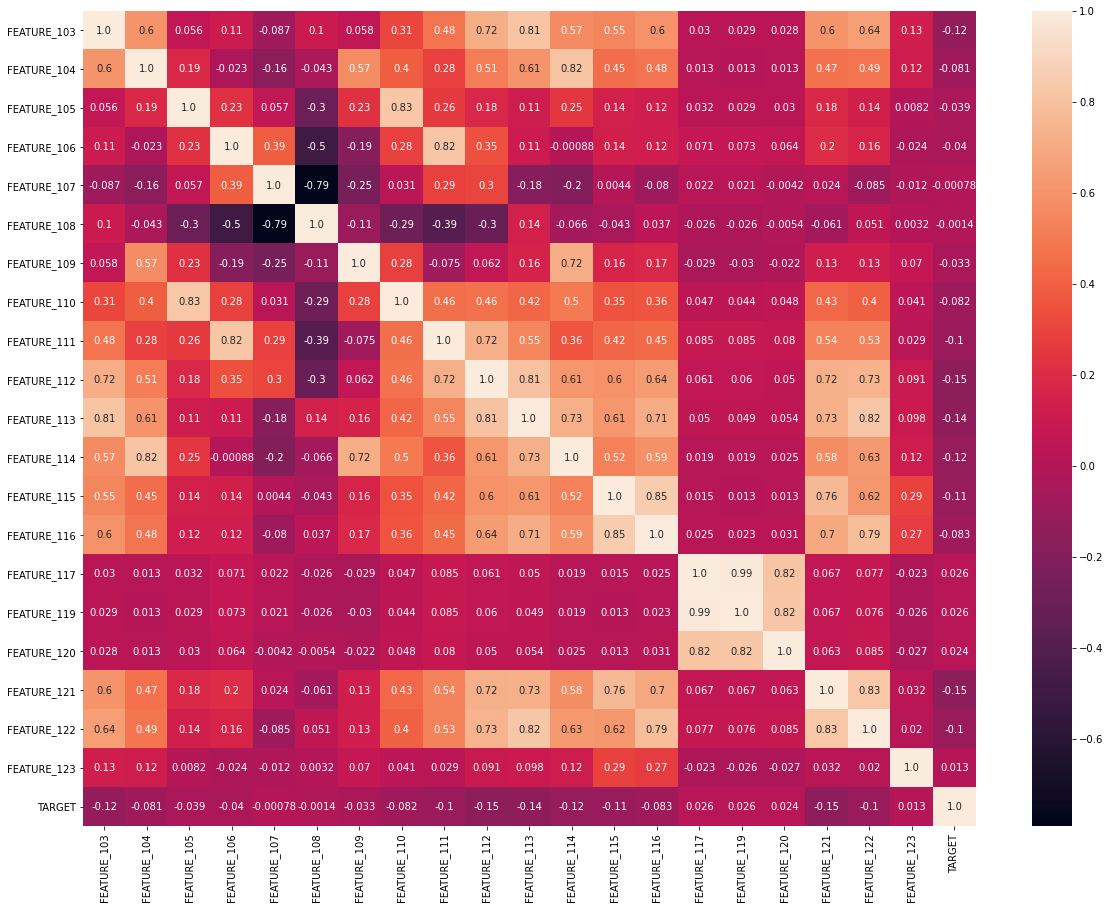

In [65]:
plt.figure(figsize=(20, 15))

sns.heatmap((df_tn.iloc[:, 100:120].join(df_tn['TARGET'])).corr(
    method='spearman'), annot=True, fmt='0.2')

Можно отметить,  что некоторые фичи либо пустые, либо имеют высокую корреляцию с другими. Можно попробовать поработать с этим.

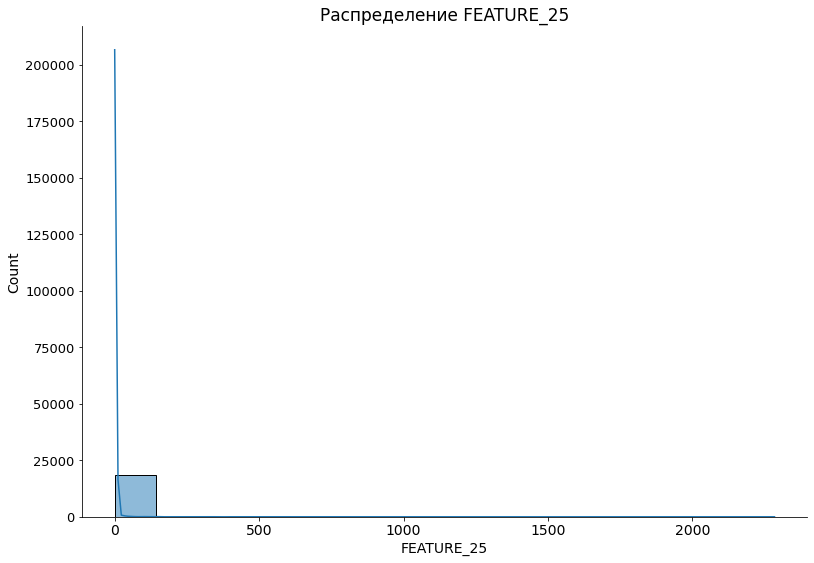

In [10]:
displot = sns.displot(df_tn.FEATURE_25, kde=True)

displot.fig.set_figheight(8)
displot.fig.set_figwidth(13)

plt.xticks(fontsize=14)
plt.yticks(fontsize=13)
plt.xlabel('FEATURE_25', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Распределение FEATURE_25', fontsize=17)

plt.show()

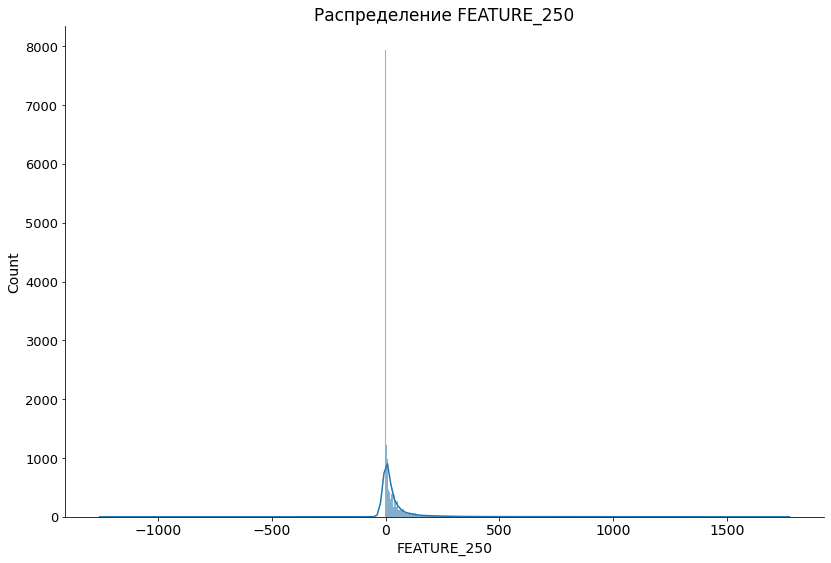

In [11]:
displot = sns.displot(df_tn.FEATURE_250, kde=True)

displot.fig.set_figheight(8)
displot.fig.set_figwidth(13)

plt.xticks(fontsize=14)
plt.yticks(fontsize=13)
plt.xlabel('FEATURE_250', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Распределение FEATURE_250', fontsize=17)

plt.show()

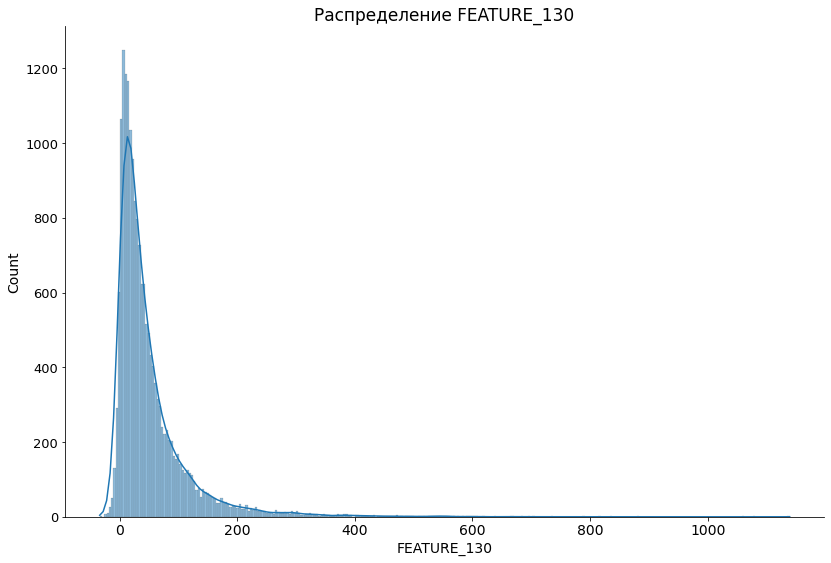

In [12]:
displot = sns.displot(df_tn.FEATURE_130, kde=True)

displot.fig.set_figheight(8)
displot.fig.set_figwidth(13)

plt.xticks(fontsize=14)
plt.yticks(fontsize=13)
plt.xlabel('FEATURE_130', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Распределение FEATURE_130', fontsize=17)

plt.show()

Данные имеют ненормальное распределение, так что при заполнении NaN значений берем медиану

# Подготовка данных

In [10]:
# Заполняем пропуски в данных

def func_fill(data):
    
    if isinstance(data, pd.Series):
        try:
            if data.dtype is pd.np.dtype(float):
                data.fillna(data.median(), inplace=True)
            elif data.dtype is pd.np.dtype(int):
                data.fillna(data.median(), inplace=True)
            elif data.dtype is pd.np.dtype(object):
                data.fillna(data.mode()[0], inplace=True)
            else:
                ('Не нашел указанные типы')
        except Exception as ex:
            print(f'Поздравляю, у тебя ошибка - {ex}')
    else:
        print('Series, не DF -_-')

In [11]:
for col in df_tn.columns:
    func_fill(df_tn[col])

for col in df_tt.columns:
    func_fill(df_tt[col])

In [12]:
# Удаляем столбцы с высокой корреляцией с другими фичами

df_tn = df_tn.drop(['FEATURE_249', 'FEATURE_256', 'FEATURE_233', 'FEATURE_240',
                    'FEATURE_253', 'FEATURE_225', 'FEATURE_228', 'FEATURE_222', 
                    'FEATURE_209', 'FEATURE_210', 'FEATURE_211', 'FEATURE_212',
                    'FEATURE_217', 'FEATURE_202', 'FEATURE_204', 'FEATURE_205', 
                    'FEATURE_169', 'FEATURE_163', 'FEATURE_162', 'FEATURE_161',
                    'FEATURE_166', 'FEATURE_144', 'FEATURE_133', 'FEATURE_141',
                    'FEATURE_118', 'FEATURE_124', 'FEATURE_76', 'FEATURE_63',
                    'FEATURE_13', 'FEATURE_1'], axis=1)

In [13]:
# Разбиваем на train и test

X = df_tn.drop(['TARGET', 'ID'], axis=1)
y = df_tn.TARGET

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, stratify=y, shuffle=True, random_state=RAND)

In [14]:
# DataFrame для записи результатов

metrics = pd.DataFrame(index=('Precision micro', 'Precision macro',
                              'Recall micro', 'Recall macro', 'F1 micro', 'F1 macro'))

# EDA with PCA

In [15]:
# Стандартизируем данные

x = df_tn.drop(['ID', 'TARGET'], axis=1).values
x = StandardScaler().fit_transform(x)

# Применяем метод главных компонент для визуализации

pca = PCA(n_components=3)
pc = pca.fit_transform(x)
df_pca = pd.DataFrame(data=pc, columns=[
                      'principal component 1', 'principal component 2', 'principal component 3'])

# Присоединяем таргет к датафрейму с результатом

res = pd.concat([df_pca, df_tn[['TARGET']]], axis=1)

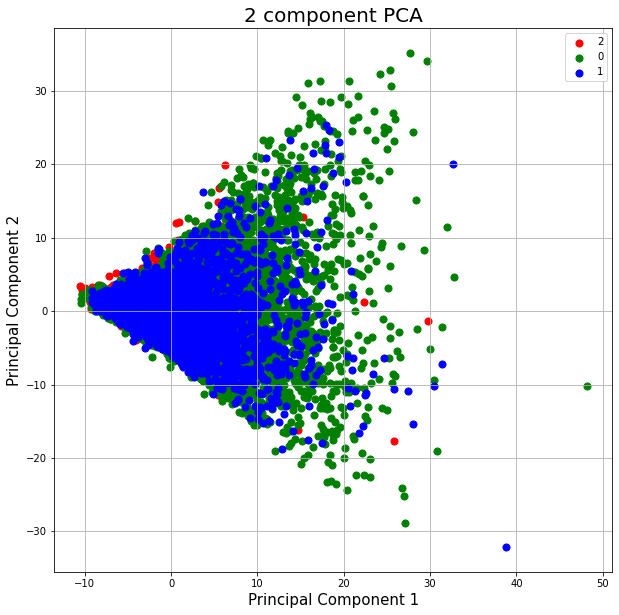

In [16]:
# Строим график

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1)

ax.set_xlabel('Principal Component 1', fontsize=15)
ax.set_ylabel('Principal Component 2', fontsize=15)
ax.set_title('2 component PCA', fontsize=20)

targets = [2, 0, 1]
colors = ['r', 'g', 'b']

# Соединяем каждую точку с ее таргетом

for target, color in zip(targets, colors):
    index = res['TARGET'] == target
    ax.scatter(res.loc[index, 'principal component 1'],
               res.loc[index, 'principal component 2'], c=color, s=50)
    
ax.legend(targets)
ax.grid()

Пока не понятно, какое именно положение имеют данные. Возможно, они находятся друг над другом и довольно хорошо разделимы, нужно построить 3Д визуализация

In [17]:
# Объясненная дисперсия

pca.explained_variance_ratio_

array([0.15065478, 0.08108805, 0.03303127])

## 3D визуализация

In [18]:
fig = px.scatter_3d(res, x='principal component 1',
                    y='principal component 2', z='principal component 3', color='TARGET')

fig.show()

Видим, что данные линейно неразделимы. Скорее всего, скор будет не сильно высокий

# Baseline

## Oversampling

In [22]:
# делаем размерности классов 1 к 1

oversample = RandomOverSampler()
X_over, y_over = oversample.fit_resample(X_train, y_train)

In [23]:
lr = LogisticRegression(penalty='l2', solver='newton-cg')

In [24]:
ovr = OneVsRestClassifier(lr)

ovr.fit(X_over, y_over)

OneVsRestClassifier(estimator=LogisticRegression(solver='newton-cg'))

In [25]:
y_pred = ovr.predict(X_test)

metrics['LogisticRegression(OS)'] = (precision_score(y_test, y_pred, average='micro'),
                                       precision_score(
                                           y_test, y_pred, average='macro'),
                                       recall_score(
                                           y_test, y_pred, average='micro'),
                                       recall_score(y_test, y_pred, average='macro'),
                                      f1_score(y_test, y_pred,
                                               average='micro'),
                                      f1_score(y_test, y_pred, average='macro')
                                      )

print('Precision micro:', precision_score(y_test, y_pred, average='micro'))
print('Precision macro:', precision_score(y_test, y_pred, average='macro'))
print('Recall micro:', recall_score(y_test, y_pred, average='micro'))
print('Recall macro:', recall_score(y_test, y_pred, average='macro'))
print('F1 micro:', f1_score(y_test, y_pred, average='micro'))
print('F1 macro:', f1_score(y_test, y_pred, average='macro'))

Precision micro: 0.5454545454545454
Precision macro: 0.4488511112971815
Recall micro: 0.5454545454545454
Recall macro: 0.5666935597734325
F1 micro: 0.5454545454545454
F1 macro: 0.455767723287505


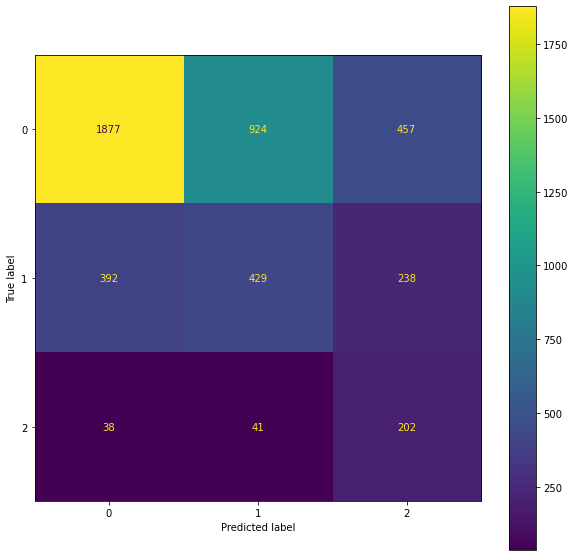

In [26]:
fig, ax = plt.subplots(figsize=(10, 10))

plot_confusion_matrix(ovr, X_test, y_test, display_labels=set(
    df_tn.TARGET), ax=ax);

## LogisticRegression(OVR)

In [27]:
lr = LogisticRegression(penalty='l2', solver='newton-cg',
                        class_weight='balanced')

ovr = OneVsRestClassifier(lr)
ovr.fit(X_train, y_train)

OneVsRestClassifier(estimator=LogisticRegression(class_weight='balanced',
                                                 solver='newton-cg'))

In [28]:
y_pred = ovr.predict(X_test)

metrics['LogisticRegression(OVR)'] = (precision_score(y_test, y_pred, average='micro'),
                                       precision_score(
                                           y_test, y_pred, average='macro'),
                                       recall_score(
                                           y_test, y_pred, average='micro'),
                                       recall_score(y_test, y_pred, average='macro'),
                                      f1_score(y_test, y_pred,
                                               average='micro'),
                                      f1_score(y_test, y_pred, average='macro')
                                      )

print('Precision micro:', precision_score(y_test, y_pred, average='micro'))
print('Precision macro:', precision_score(y_test, y_pred, average='macro'))
print('Recall micro:', recall_score(y_test, y_pred, average='micro'))
print('Recall macro:', recall_score(y_test, y_pred, average='macro'))
print('F1 micro:', f1_score(y_test, y_pred, average='micro'))
print('F1 macro:', f1_score(y_test, y_pred, average='macro'))

Precision micro: 0.5628534145280557
Precision macro: 0.45829857854238193
Recall micro: 0.5628534145280557
Recall macro: 0.575281763652607
F1 micro: 0.5628534145280557
F1 macro: 0.470627524142399


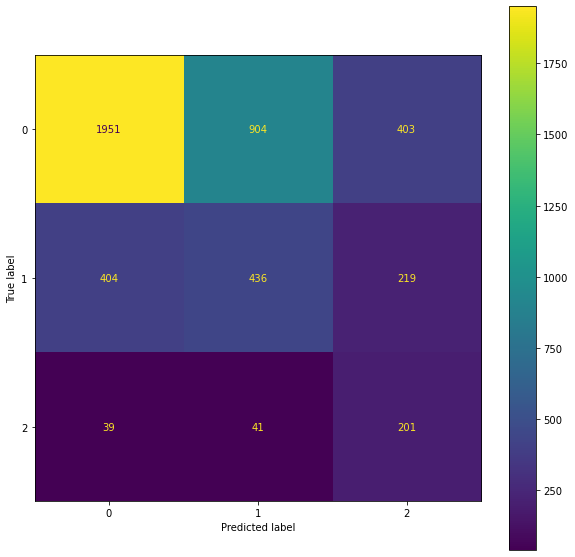

In [29]:
fig, ax = plt.subplots(figsize=(10, 10))

plot_confusion_matrix(ovr, X_test, y_test, display_labels=set(
    df_tn.TARGET), ax=ax);

## LogisticRegression(OVO)

In [30]:
ovo = OneVsOneClassifier(lr)

ovo.fit(X_train, y_train)

OneVsOneClassifier(estimator=LogisticRegression(class_weight='balanced',
                                                solver='newton-cg'))

In [31]:
y_pred = ovo.predict(X_test)

metrics['LogisticRegression(OVO)'] = (precision_score(y_test, y_pred, average='micro'),
                                       precision_score(
                                           y_test, y_pred, average='macro'),
                                       recall_score(
                                           y_test, y_pred, average='micro'),
                                       recall_score(y_test, y_pred, average='macro'),
                                      f1_score(y_test, y_pred,
                                               average='micro'),
                                      f1_score(y_test, y_pred, average='macro')
                                      )

print('Precision micro:', precision_score(y_test, y_pred, average='micro'))
print('Precision macro:', precision_score(y_test, y_pred, average='macro'))
print('Recall micro:', recall_score(y_test, y_pred, average='micro'))
print('Recall macro:', recall_score(y_test, y_pred, average='macro'))
print('F1 micro:', f1_score(y_test, y_pred, average='micro'))
print('F1 macro:', f1_score(y_test, y_pred, average='macro'))

Precision micro: 0.5437146585471945
Precision macro: 0.454506519328339
Recall micro: 0.5437146585471945
Recall macro: 0.5728859149320282
F1 micro: 0.5437146585471945
F1 macro: 0.46269797408446056


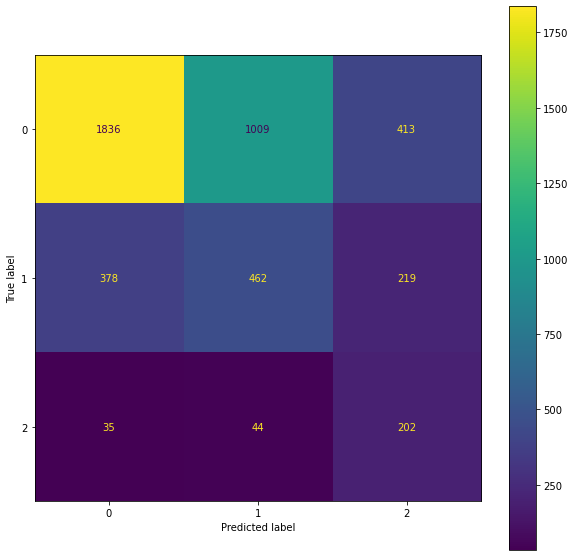

In [32]:
fig, ax = plt.subplots(figsize=(10, 10))

plot_confusion_matrix(ovo, X_test, y_test, display_labels=set(
    df_tn.TARGET), ax=ax);

## CatBoostClassifier(OVR)

In [33]:
cat = CatBoostClassifier(auto_class_weights='Balanced',
                         verbose=False)

In [34]:
ovr = OneVsRestClassifier(cat)

ovr.fit(X_train, y_train)

OneVsRestClassifier(estimator=<catboost.core.CatBoostClassifier object at 0x7fcb40c333d0>)

In [35]:
y_pred = ovr.predict(X_test)

metrics['CatBoostClassifier(OVR)'] = (precision_score(y_test, y_pred, average='micro'),
                                      precision_score(
                                          y_test, y_pred, average='macro'),
                                      recall_score(y_test, y_pred,
                                                   average='micro'),
                                      recall_score(y_test, y_pred,
                                                   average='macro'),
                                      f1_score(y_test, y_pred,
                                               average='micro'),
                                      f1_score(y_test, y_pred, average='macro')
                                      )

print('Precision micro:', precision_score(y_test, y_pred, average='micro'))
print('Precision macro:', precision_score(y_test, y_pred, average='macro'))
print('Recall micro:', recall_score(y_test, y_pred, average='micro'))
print('Recall macro:', recall_score(y_test, y_pred, average='macro'))
print('F1 micro:', f1_score(y_test, y_pred, average='micro'))
print('F1 macro:', f1_score(y_test, y_pred, average='macro'))

Precision micro: 0.676163549369291
Precision macro: 0.539640486413949
Recall micro: 0.676163549369291
Recall macro: 0.557090597322562
F1 micro: 0.676163549369291
F1 macro: 0.5477017747082558


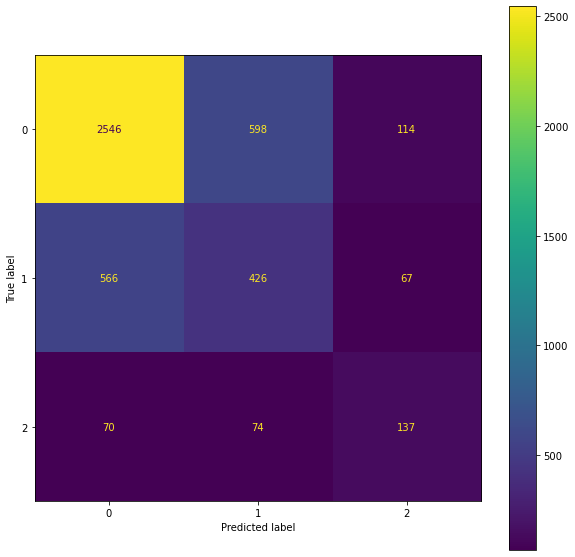

In [36]:
fig, ax = plt.subplots(figsize=(10, 10))

plot_confusion_matrix(ovr, X_test, y_test, display_labels=set(
    df_tn.TARGET), ax=ax);

## CatBoostClassifier(OVO)

In [38]:
ovo = OneVsOneClassifier(cat)

ovo.fit(X_train, y_train)

OneVsOneClassifier(estimator=<catboost.core.CatBoostClassifier object at 0x7fcb40c333d0>)

In [39]:
y_pred = ovo.predict(X_test)

metrics['CatBoostClassifier(OVO)'] = (precision_score(y_test, y_pred, average='micro'),
                                      precision_score(
                                          y_test, y_pred, average='macro'),
                                      recall_score(y_test, y_pred,
                                                   average='micro'),
                                      recall_score(y_test, y_pred,
                                                   average='macro'),
                                      f1_score(y_test, y_pred,
                                               average='micro'),
                                      f1_score(y_test, y_pred, average='macro')
                                      )

print('Precision micro:', precision_score(y_test, y_pred, average='micro'))
print('Precision macro:', precision_score(y_test, y_pred, average='macro'))
print('Recall micro:', recall_score(y_test, y_pred, average='micro'))
print('Recall macro:', recall_score(y_test, y_pred, average='macro'))
print('F1 micro:', f1_score(y_test, y_pred, average='micro'))
print('F1 macro:', f1_score(y_test, y_pred, average='macro'))

Precision micro: 0.658329708568943
Precision macro: 0.5156725769514982
Recall micro: 0.658329708568943
Recall macro: 0.5631345593273712
F1 micro: 0.658329708568943
F1 macro: 0.5341485165704193


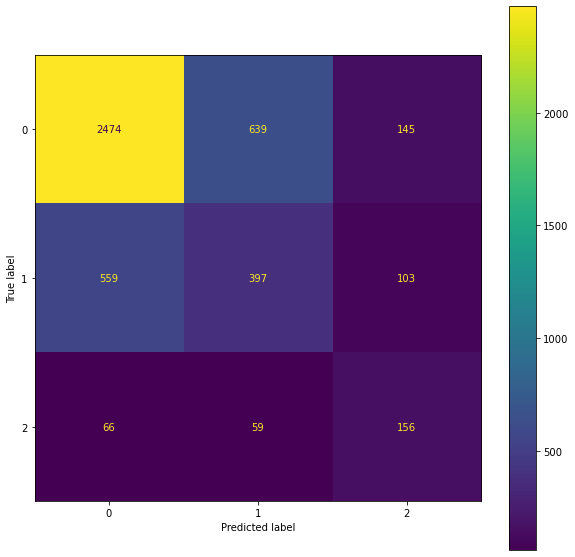

In [40]:
fig, ax = plt.subplots(figsize=(10, 10))

plot_confusion_matrix(ovo, X_test, y_test, display_labels=set(
    df_tn.TARGET), ax=ax);

## CatBoost with PCA

In [41]:
# Делаем размерности классов 1 к 1

oversample = RandomOverSampler()
X_over, y_over = oversample.fit_resample(X_train, y_train)

In [42]:
# Стандартизуем данные

st = StandardScaler()

X_train_std = st.fit_transform(X_over)
X_test_std = st.transform(X_test)

In [43]:
pca = PCA(n_components=3).fit(X_train_std)

In [44]:
train_pca = pca.transform(X_train_std)
test_pca = pca.transform(X_test_std)

In [45]:
cat = CatBoostClassifier(verbose=False)

In [46]:
ovr_pca = OneVsRestClassifier(cat)

ovr_pca.fit(train_pca, y_over)

OneVsRestClassifier(estimator=<catboost.core.CatBoostClassifier object at 0x7fcb60b9e190>)

In [47]:
y_pred = ovr_pca.predict(test_pca)

print('Precision micro:', precision_score(y_test, y_pred, average='micro'))
print('Precision macro:', precision_score(y_test, y_pred, average='macro'))
print('Recall micro:', recall_score(y_test, y_pred, average='micro'))
print('Recall macro:', recall_score(y_test, y_pred, average='macro'))
print('F1 micro:', f1_score(y_test, y_pred, average='micro'))
print('F1 macro:', f1_score(y_test, y_pred, average='macro'))

Precision micro: 0.49521531100478466
Precision macro: 0.3978912965960956
Recall micro: 0.49521531100478466
Recall macro: 0.4798144135512444
F1 micro: 0.49521531100478466
F1 macro: 0.40367581286125165


## SVM

In [48]:
svc = SVC(kernel='rbf', class_weight='balanced')

In [49]:
svc.fit(X_train, y_train)

SVC(class_weight='balanced')

In [50]:
y_pred = svc.predict(X_test)

metrics['SVM'] = (precision_score(y_test, y_pred, average='micro'),
                  precision_score(
    y_test, y_pred, average='macro'),
    recall_score(y_test, y_pred,
                 average='micro'),
    recall_score(y_test, y_pred,
                 average='macro'),
    f1_score(y_test, y_pred,
             average='micro'),
    f1_score(y_test, y_pred, average='macro')
)

print('Precision micro:', precision_score(y_test, y_pred, average='micro'))
print('Precision macro:', precision_score(y_test, y_pred, average='macro'))
print('Recall micro:', recall_score(y_test, y_pred, average='micro'))
print('Recall macro:', recall_score(y_test, y_pred, average='macro'))
print('F1 micro:', f1_score(y_test, y_pred, average='micro'))
print('F1 macro:', f1_score(y_test, y_pred, average='macro'))

Precision micro: 0.39277946933449326
Precision macro: 0.3988792057363486
Recall micro: 0.39277946933449326
Recall macro: 0.5080465800590467
F1 micro: 0.3927794693344933
F1 macro: 0.3512423201393027


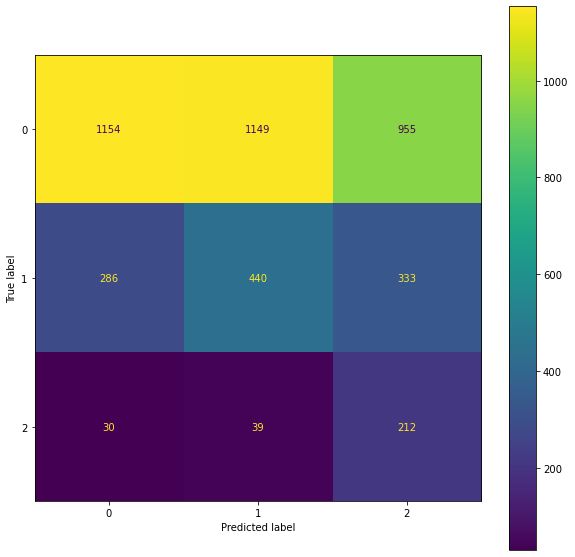

In [51]:
fig, ax = plt.subplots(figsize=(10, 10))

plot_confusion_matrix(svc, X_test, y_test, display_labels=set(
    df_tn.TARGET), ax=ax);

## Вывод таблицы с метриками

In [52]:
metrics.style.highlight_max(color='orange', axis=1)

# Permutation Importance

## Влияние той или иной фичи на определение класса

In [53]:
cat = CatBoostClassifier(auto_class_weights='Balanced',
                         verbose=False).fit(X_train, y_train)

In [54]:
# X_test на основании которого проверяем признаков

X_importance = X_test

# Создаем прогнозные значения для каждой фичи 

explainer = shap.TreeExplainer(cat)
shap_values = explainer.shap_values(X_importance)

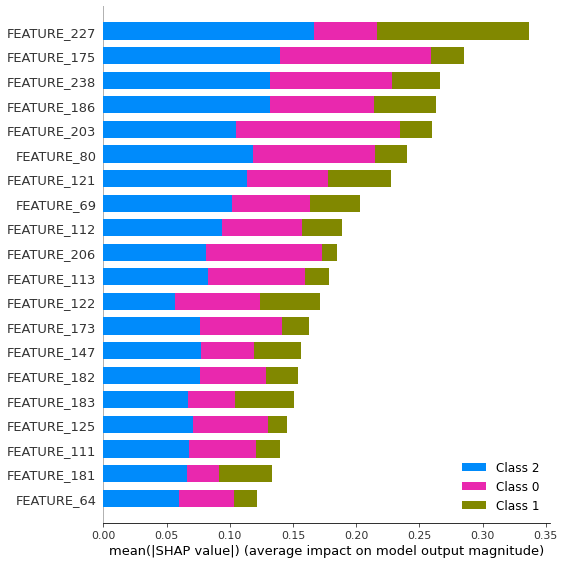

In [55]:
shap.summary_plot(shap_values, X_importance.values,
                  plot_type='bar', feature_names=X_importance.columns)

Модель в большинстве фичей плохо различает нулевой и второй класс

## Топ фичей для класса 0

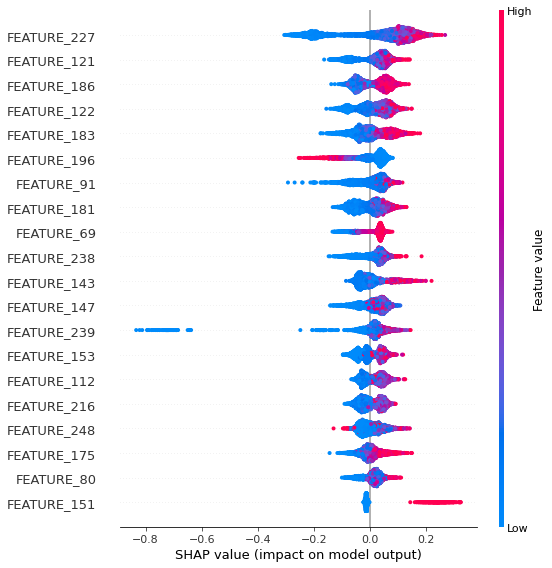

In [56]:
shap.summary_plot(shap_values[1], X_importance.values, feature_names=X_importance.columns)

Топ-3 фичи для класса 0 - 227, 122 и 121 соответственно

## Топ фичей для класса 1

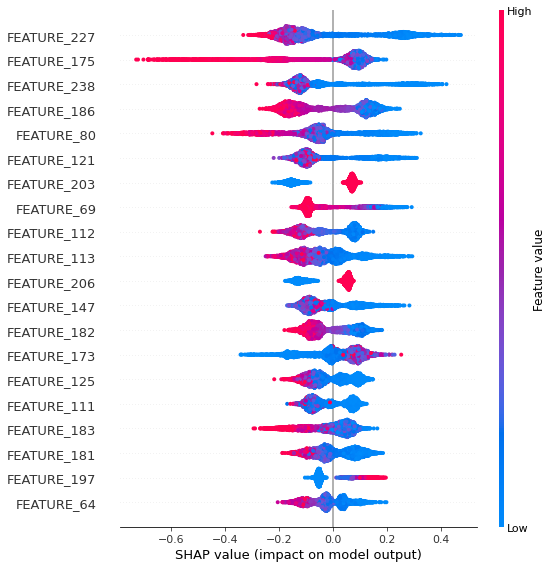

In [57]:
shap.summary_plot(shap_values[2], X_importance.values, feature_names=X_importance.columns)

Топ-3 фичи для класса 0 - 175, 227 и 186 соответственно. Фича под номером 175 более всех влияет на модель - чем больше ее значение, тем меньше вероятность отнесения ее к классу 1

## Топ фичей для класса 2

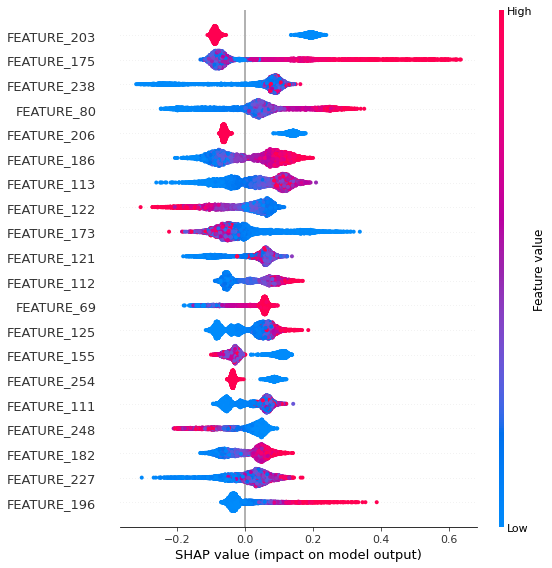

In [58]:
shap.summary_plot(shap_values[0], X_importance.values, feature_names=X_importance.columns)

Топ-3 фичи для класса 0 - 175, 206 и 203 соответственно. Фича под номером 175 более всех влияет на модель - чем больше ее значение, тем больше вероятность отнесения ее к классу 1

# Predict

In [59]:
ids = df_tt['ID']
predict = ovr.predict(df_tt.drop(['ID'], axis=1))

output = pd.DataFrame({'ID': ids, 'TARGET': predict})

In [60]:
output

ID  TARGET
0       84728433       0
1      335016156       1
2     1163752045       0
3       84929758       0
4      143090121       0
...          ...     ...
6126    87822820       0
6127   648084027       1
6128  1402792850       1
6129  1032223762       0
6130    89099843       1

[6131 rows x 2 columns]

In [61]:
output['TARGET'].value_counts() / output['TARGET'].count()

0    0.686674
1    0.241559
2    0.071766
Name: TARGET, dtype: float64

In [62]:
output.to_csv('contest_answer.csv', index=False)

# Выводы

Смотрим на топ фичи для каждого класса:

- 0 класс: FEATURE_227, FEATURE_121 и FEATURE_186. Чем меньше каждый из параметров - тем меньше вероятность отнесения к нулевому классу. 

- 1 класс: FEATURE_227, FEATURE_175 и FEATURE_238. Чем больше значение параметра 175 - тем меньше вероятность отнесения к первому классу. С 227 и 238 фичой наоборот, чем меньше значение, тем больше шанс отнесения к 1 классу.

- 2 класс: FEATURE_203, FEATURE_175 и FEATURE_238. Чем больше значение параметра 175 - тем больше вероятность отнесения ко второму классу. 238 - чем меньше значение, тем меньше шанс на данный класс. 203 - чем меньше значение, тем больше шанс. 


Дальнейшие действия: нужно посмотреть какие именно действия наших пользователей означают данные фичи. Cделать Feature Engineering, попробовать максимально обогатить данные на основе полученной информации -> увеличить скор по выбранной нами метрике.